In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import data and drop NAs

calculate metascore/10 and rating*10

In [2]:
imdb = pd.read_csv("C:\\Users\\Adam\\Google Drive\\School\\ComputerScience\\intro to data science\\Project_IMDB\\movie_profiles.csv")
imdb = imdb.dropna()
imdb = imdb.assign(rating10=(imdb['rating']*10))
imdb = imdb.assign(metascore10=(imdb['metascore']/10))
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 2 to 220
Data columns (total 91 columns):
Unnamed: 0                                167 non-null int64
avg_screens                               167 non-null float64
budget                                    167 non-null float64
budget_currency                           167 non-null object
closing_date                              167 non-null object
critic_review_count                       167 non-null float64
duration                                  167 non-null float64
gross_income                              167 non-null float64
max_screens                               167 non-null float64
metascore                                 167 non-null float64
name                                      167 non-null object
num_weekends                              167 non-null float64
opening_weekend_date                      167 non-null object
opening_weekend_income                    167 non-null float64
opening_weekend_inc

create movie profit score column

In [3]:
imdb = imdb.assign(score1=imdb['gross_income']/imdb['budget'])
imdb = imdb.assign(score2=(imdb['gross_income']-imdb['budget']))  # best score measure
imdb = imdb.assign(score3=np.log(imdb['gross_income'])/np.log(imdb['budget']))



In [4]:
imdb.head()

,Unnamed: 0,avg_screens,budget,budget_currency,closing_date,critic_review_count,duration,gross_income,max_screens,metascore,...,genres.sci-fi,genres.sport,genres.thriller,genres.war,genres.western,rating10,metascore10,score1,score2,score3
2,2,2605.375000,50000000.0,$,2014-11-07,334.0,112.0,191616238.0,3426.0,71.0,...,0,0,0,0,0,71.0,7.1,3.832325,141616238.0,1.075784
3,3,1891.833333,110000000.0,$,2014-05-16,366.0,102.0,106369117.0,3490.0,48.0,...,0,0,0,0,0,62.0,4.8,0.966992,-3630883.0,0.998187
4,4,938.750000,28000000.0,$,2014-05-09,214.0,117.0,30688364.0,2872.0,40.0,...,0,0,1,0,0,62.0,4.0,1.096013,2688364.0,1.005346
7,7,1803.166667,40000000.0,$,2014-07-11,307.0,116.0,42615685.0,3160.0,44.0,...,0,0,0,0,1,61.0,4.4,1.065392,2615685.0,1.003619
8,8,2714.000000,28000000.0,$,2014-10-17,255.0,114.0,25977365.0,2714.0,57.0,...,0,0,0,0,0,65.0,5.7,0.927763,-2022635.0,0.995627


In [5]:
imdb[['score2', 'name','rating','metascore']].sort_values('score2',ascending=0)

,score2,name,rating,metascore
95,502177271.0,Jurassic World,7.0,59.0
113,262029560.0,Minions,6.4,56.0
19,208991599.0,Avengers: Age of Ultron,7.4,66.0
85,181454367.0,Inside Out,8.2,94.0
71,163130696.0,Guardians of the Galaxy,8.1,76.0
65,160034110.0,Furious 7,7.2,67.0
132,154436380.0,Pitch Perfect 2,6.5,63.0
2,141616238.0,22 Jump Street,7.1,71.0
119,132056505.0,Neighbors,6.4,68.0
62,126147885.0,Fifty Shades of Grey,4.1,46.0


gross_income and rating/metascore

<IPython.core.display.Javascript object>


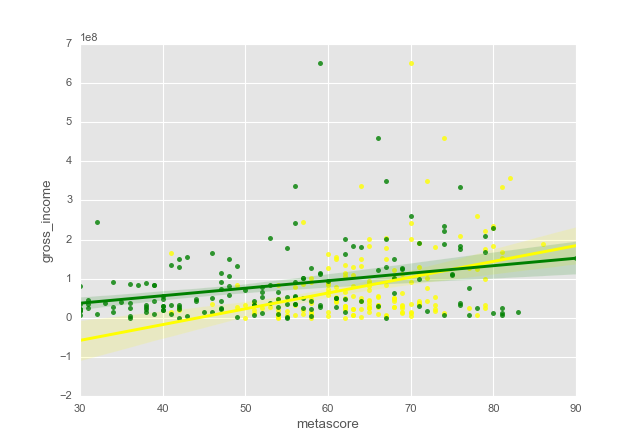

In [6]:
plt.figure()
sns.regplot(x = imdb['rating']*10, y = 'gross_income', data = imdb, color = 'yellow')
sns.regplot(x = imdb['metascore'], y = 'gross_income', data = imdb, color = 'Green')


<IPython.core.display.Javascript object>


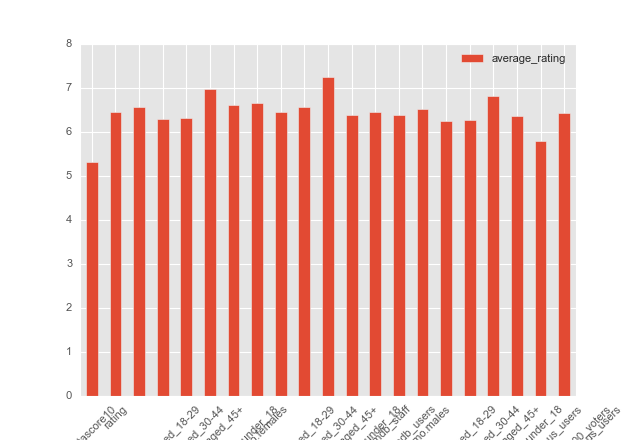

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

In [7]:
temp = pd.DataFrame(imdb[['metascore10','rating'] + [avg for avg in imdb.columns if 'avg_rating' in avg]].mean())
temp.columns = ['average_rating']
temp.plot(kind='bar')
plt.xticks(rotation=45)

<IPython.core.display.Javascript object>


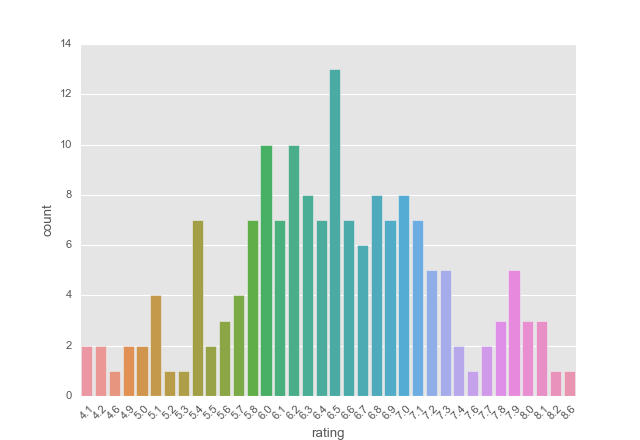

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

In [8]:
plt.figure()
sns.countplot(x = 'rating', data = imdb)
plt.xticks(rotation=45)


<IPython.core.display.Javascript object>


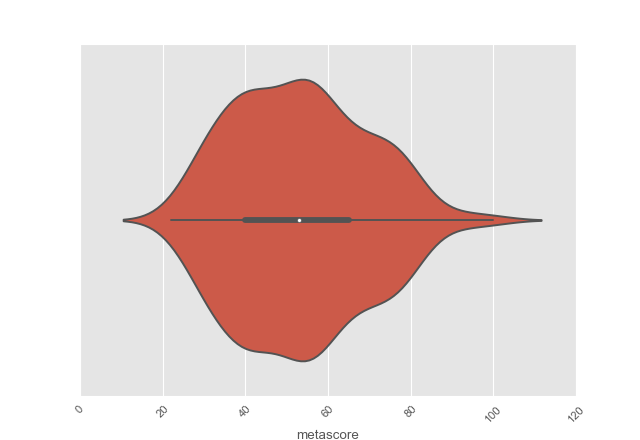

In [9]:
plt.figure()
sns.violinplot(x = 'metascore', data = imdb,)
xt = plt.xticks(rotation=45)


In [10]:
temp = pd.DataFrame(
    data = {
            'type':
                [i for i in range(1,11) for genre in imdb.columns  if 'genre' in genre],
            'votes':
                [imdb[imdb[genre] == 1]['rating_freq.1'].mean() for genre in imdb.columns if 'genre' in genre] +
                [imdb[imdb[genre] == 1]['rating_freq.2'].mean() for genre in imdb.columns if 'genre' in genre] +
                [imdb[imdb[genre] == 1]['rating_freq.3'].mean() for genre in imdb.columns if 'genre' in genre] +
                [imdb[imdb[genre] == 1]['rating_freq.4'].mean() for genre in imdb.columns if 'genre' in genre] +
                [imdb[imdb[genre] == 1]['rating_freq.5'].mean() for genre in imdb.columns if 'genre' in genre] +
                [imdb[imdb[genre] == 1]['rating_freq.6'].mean() for genre in imdb.columns if 'genre' in genre] +
                [imdb[imdb[genre] == 1]['rating_freq.7'].mean() for genre in imdb.columns if 'genre' in genre] +
                [imdb[imdb[genre] == 1]['rating_freq.8'].mean() for genre in imdb.columns if 'genre' in genre] +
                [imdb[imdb[genre] == 1]['rating_freq.9'].mean() for genre in imdb.columns if 'genre' in genre] +
                [imdb[imdb[genre] == 1]['rating_freq.10'].mean() for genre in imdb.columns if 'genre' in genre]
        },
    index= 
         [genre for genre in imdb.columns if 'genre' in genre]*10
    
)

In [11]:
temp

,type,votes
genres.action,1,3899.909091
genres.adventure,1,3852.820000
genres.animation,1,1590.857143
genres.biography,1,791.333333
genres.comedy,1,1869.966667
genres.crime,1,2078.333333
genres.drama,1,2873.281690
genres.family,1,1276.454545
genres.fantasy,1,2800.909091
genres.history,1,419.000000


<IPython.core.display.Javascript object>


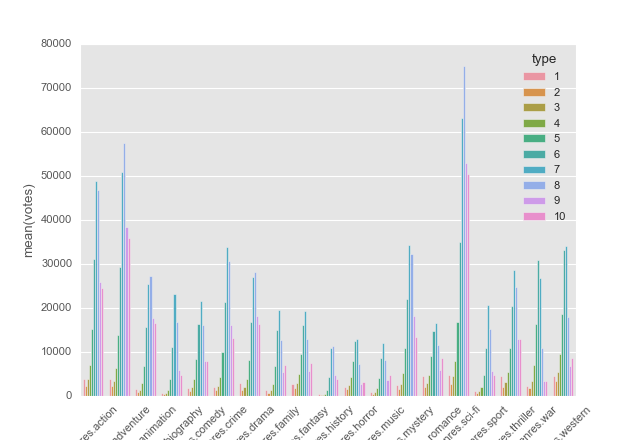

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

In [12]:
plt.figure()
sns.barplot(x = temp.index , y = 'votes',hue = 'type', data = temp)
plt.xticks(rotation=45)

In [13]:
[i for i in range(1,11) for genre in imdb.columns  if 'genre' in genre]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

scattering stuff

<IPython.core.display.Javascript object>


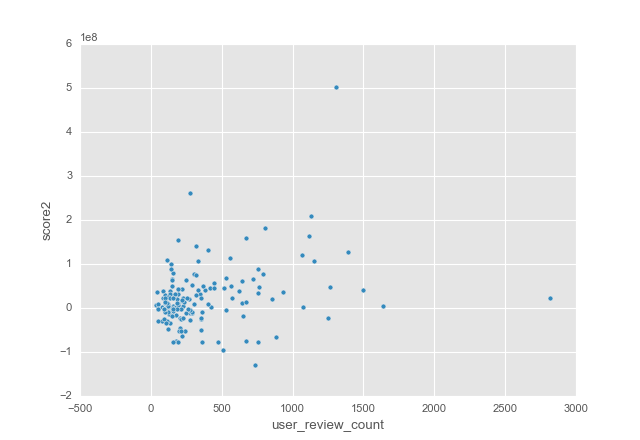

In [14]:
imdb.plot(kind='scatter', x='user_review_count', y='score2');

<IPython.core.display.Javascript object>


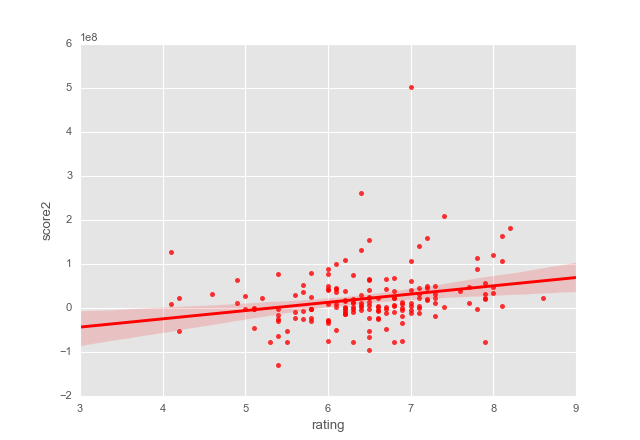

In [15]:
plt.figure()
sns.regplot(x = 'rating', y = 'score2', data = imdb, color = 'red')

<IPython.core.display.Javascript object>


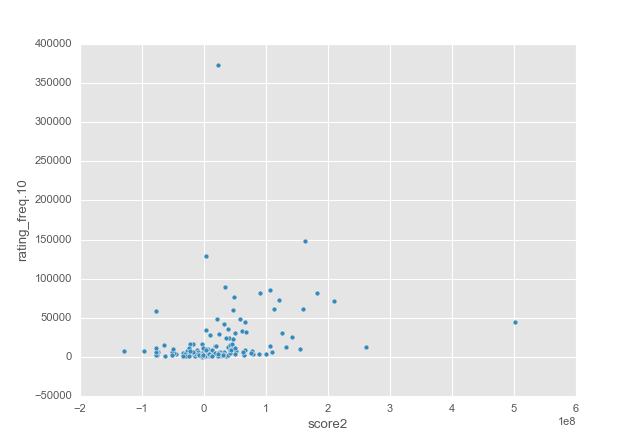

In [16]:
imdb.plot(kind='scatter', x='score2', y='rating_freq.10');

<IPython.core.display.Javascript object>


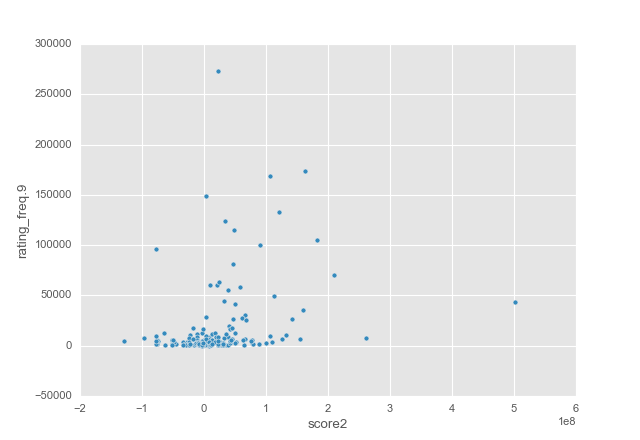

In [17]:
imdb.plot(kind='scatter', x='score2', y='rating_freq.9');

<IPython.core.display.Javascript object>


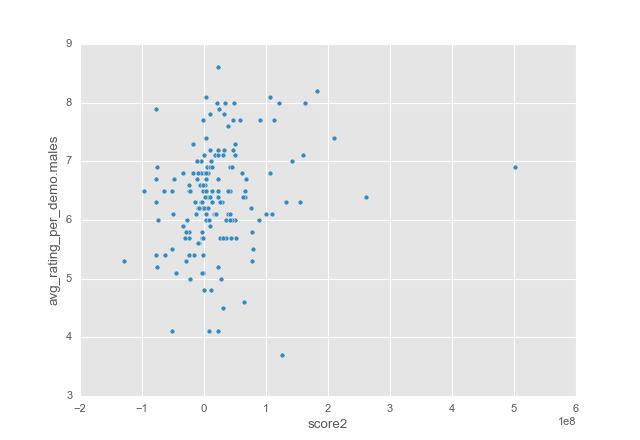

In [18]:
imdb.plot(kind='scatter', x='score2', y='avg_rating_per_demo.males');

<IPython.core.display.Javascript object>


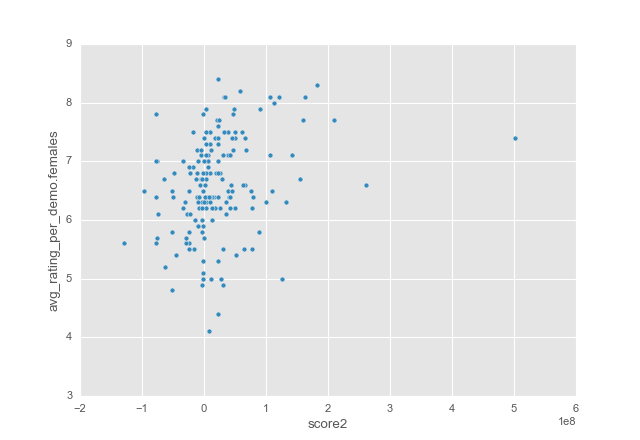

In [19]:
imdb.plot(kind='scatter', x='score2', y='avg_rating_per_demo.females');

<IPython.core.display.Javascript object>


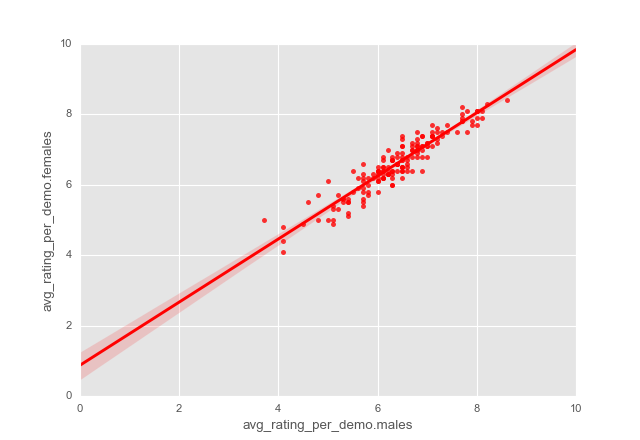

In [20]:
plt.figure()
plt.ylim([0,10])
plt.xlim([0,10])
sns.regplot(x ='avg_rating_per_demo.males', y = 'avg_rating_per_demo.females', data = imdb, color = 'red')

In [21]:
imdb[['avg_rating_per_demo.males','avg_rating_per_demo.females']].corr()

,avg_rating_per_demo.males,avg_rating_per_demo.females
avg_rating_per_demo.males,1.000000,0.942707
avg_rating_per_demo.females,0.942707,1.000000


<IPython.core.display.Javascript object>


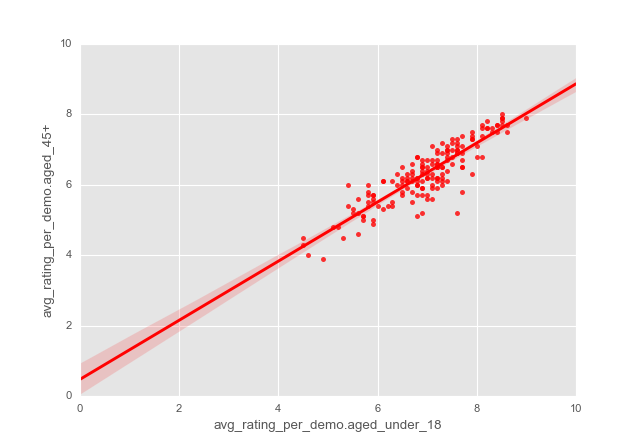

In [22]:
plt.figure()
plt.ylim([0,10])
plt.xlim([0,10])
sns.regplot(x ='avg_rating_per_demo.aged_under_18', y = 'avg_rating_per_demo.aged_45+', data = imdb, color = 'red')

<IPython.core.display.Javascript object>


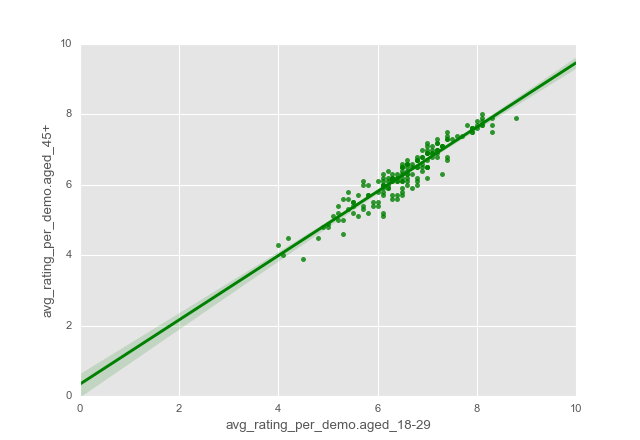

In [23]:
plt.figure()
plt.ylim([0,10])
plt.xlim([0,10])
sns.regplot(x ='avg_rating_per_demo.aged_18-29', y = 'avg_rating_per_demo.aged_45+', data = imdb, color = 'green')

<IPython.core.display.Javascript object>


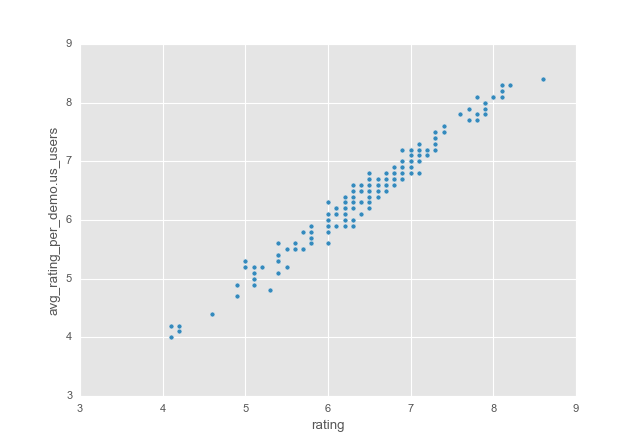

In [24]:
imdb.plot(kind='scatter', x='rating', y='avg_rating_per_demo.us_users');

<IPython.core.display.Javascript object>


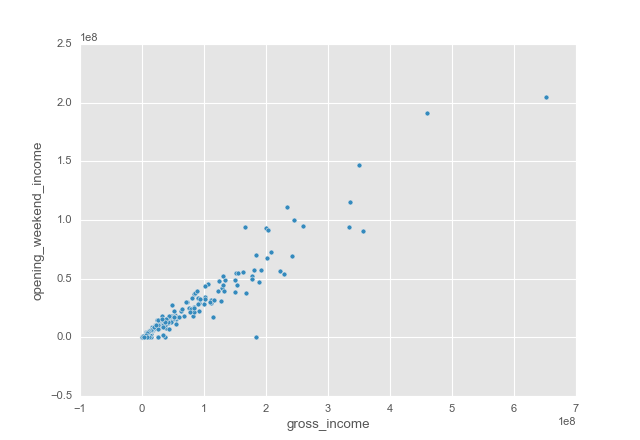

In [25]:
imdb.plot(kind='scatter', x='gross_income', y='opening_weekend_income')

In [26]:
imdb[['metascore','critic_review_count','rating','rating_count','gross_income','rating_freq.3','rating_freq.4','rating_freq.5','rating_freq.6',
      'rating_freq.7','rating_freq.8','rating_freq.9','score2']].corr()

,metascore,critic_review_count,rating,rating_count,gross_income,rating_freq.3,rating_freq.4,rating_freq.5,rating_freq.6,rating_freq.7,rating_freq.8,rating_freq.9,score2
metascore,1.000000,0.598410,0.720157,0.469108,0.334315,-0.153627,-0.155670,-0.060660,0.183858,0.480694,0.547528,0.497116,0.270066
critic_review_count,0.598410,1.000000,0.561975,0.849297,0.580853,0.397623,0.440640,0.531513,0.696006,0.848516,0.805436,0.724492,0.292896
rating,0.720157,0.561975,1.000000,0.601149,0.379034,-0.285227,-0.235906,-0.060541,0.294135,0.641611,0.688994,0.623996,0.241935
rating_count,0.469108,0.849297,0.601149,1.000000,0.659186,0.361406,0.394553,0.489548,0.684664,0.907577,0.944738,0.929703,0.390135
gross_income,0.334315,0.580853,0.379034,0.659186,1.000000,0.345536,0.394966,0.495883,0.639909,0.703194,0.596591,0.503189,0.789826
rating_freq.3,-0.153627,0.397623,-0.285227,0.361406,0.345536,1.000000,0.969006,0.857069,0.602340,0.296576,0.141310,0.130759,0.157274
rating_freq.4,-0.155670,0.440640,-0.235906,0.394553,0.394966,0.969006,1.000000,0.951501,0.735884,0.381541,0.164298,0.127541,0.173187
rating_freq.5,-0.060660,0.531513,-0.060541,0.489548,0.495883,0.857069,0.951501,1.000000,0.893672,0.547200,0.267905,0.190855,0.242077
rating_freq.6,0.183858,0.696006,0.294135,0.684664,0.639909,0.602340,0.735884,0.893672,1.000000,0.818853,0.526270,0.391397,0.372779
rating_freq.7,0.480694,0.848516,0.641611,0.907577,0.703194,0.296576,0.381541,0.547200,0.818853,1.000000,0.885934,0.734655,0.446215


<IPython.core.display.Javascript object>


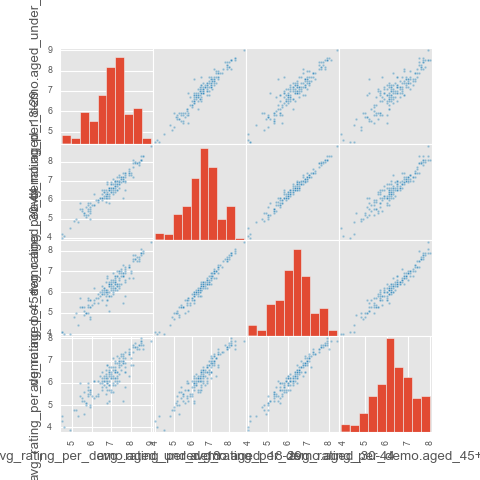

In [27]:
from pandas.tools.plotting import scatter_matrix

axs = scatter_matrix(imdb[['avg_rating_per_demo.aged_under_18','avg_rating_per_demo.aged_18-29',
                     'avg_rating_per_demo.aged_30-44','avg_rating_per_demo.aged_45+']], alpha=0.5, figsize=(6, 6))


<IPython.core.display.Javascript object>


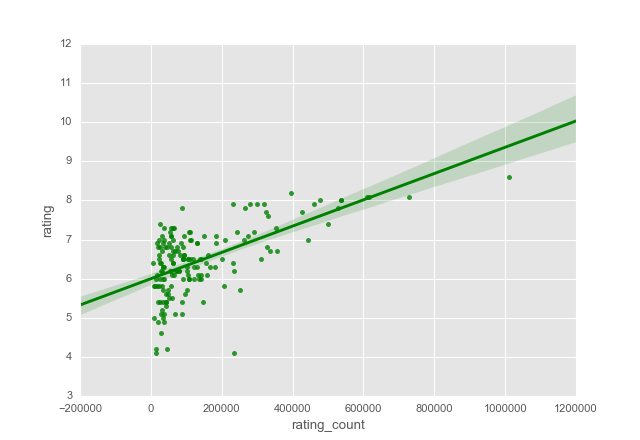

In [28]:
plt.figure()
sns.regplot(x = 'rating_count', y = 'rating', data = imdb, color = 'Green')

In [29]:
temp = pd.DataFrame(
    data={
        'sex':
        ['male' for genre in imdb.columns if 'genre' in genre]
        +
        ['female' for genre in imdb.columns if 'genre' in genre],
     
        'score':
        [
            imdb[imdb[genre] == 1]['votes_per_demo.males'].mean() 
            for genre in imdb.columns if 'genre' in genre
        ] 
        +
        [
            imdb[imdb[genre] == 1]['votes_per_demo.females'].mean() 
            for genre in imdb.columns if 'genre' in genre
        ]
    },
    index=
    [genre[genre.rfind('.')+1:] for genre in imdb.columns if 'genre' in genre] 
    +
    [genre[genre.rfind('.')+1:] for genre in imdb.columns if 'genre' in genre] 
)    

<IPython.core.display.Javascript object>


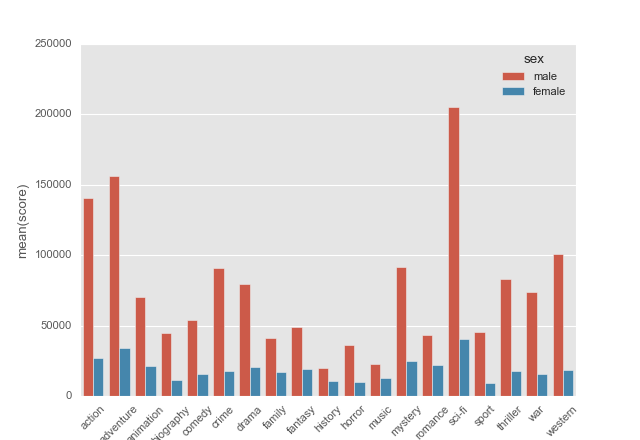

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

In [30]:
plt.figure()
sns.barplot(x = temp.index , y = 'score',hue = 'sex', data = temp)
plt.xticks(rotation=45)

In [31]:
temp1 = pd.DataFrame(
    data={
        'sex':
        ['male' for genre in imdb.columns if 'genre' in genre]
        +
        ['female' for genre in imdb.columns if 'genre' in genre],
     
        'score':
        [
            imdb[imdb[genre] == 1]['avg_rating_per_demo.males'].mean() 
            for genre in imdb.columns if 'genre' in genre
        ] 
        +
        [
            imdb[imdb[genre] == 1]['avg_rating_per_demo.females'].mean() 
            for genre in imdb.columns if 'genre' in genre
        ]
    },
    index=
    [genre[genre.rfind('.')+1:] for genre in imdb.columns if 'genre' in genre] 
    +
    [genre[genre.rfind('.')+1:] for genre in imdb.columns if 'genre' in genre] 
)    

<IPython.core.display.Javascript object>


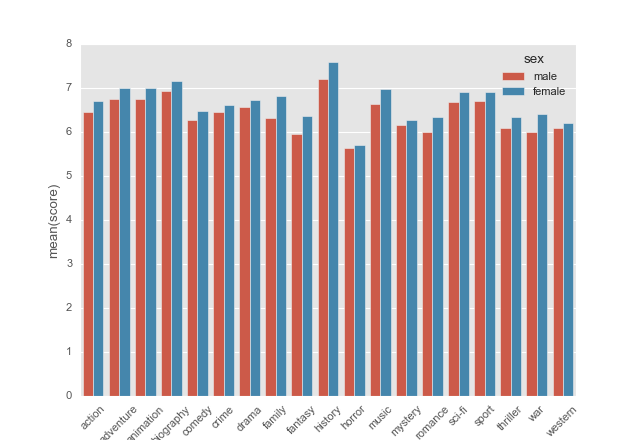

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

In [32]:
plt.figure()
sns.barplot(x = temp1.index , y = 'score',hue = 'sex', data = temp1)
plt.xticks(rotation=45)

In [33]:
temp

,score,sex
action,140373.345455,male
adventure,155980.900000,male
animation,70309.714286,male
biography,44974.800000,male
comedy,54078.866667,male
crime,91256.444444,male
drama,79333.619718,male
family,41223.181818,male
fantasy,48698.636364,male
history,20126.000000,male
